In [2]:
import sys 
sys.path.append("../")
import torch
from torch import optim, save
from torchvision import datasets, transforms
from torchvision.utils import save_image
#from pprint import pprint 
import time

import lipmip.utilities as utils
from lipmip.relu_nets import ReLUNet
#import lipmip.neural_nets.data_loaders as data_loaders
#import lipmip.neural_nets.train as train 
from lipmip.hyperbox import Hyperbox 
import lipmip.interval_analysis as ia 
from lipmip.lipMIP import LipMIP

/u/abhi24/matlaberp2/posthoc_privacy/.projenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np

In [4]:
from adversarial_training import ARL

In [25]:
radius = 0.3
dims = 8
num_dims = 22
num_samples = 100
lst = []
for num in range(1, num_dims+1):
    arch = [num, 5, 5]
    print(arch)
    net = ReLUNet(arch)
    times = []
    for _ in range(num_samples):
        center = torch.rand(num)
        simple_domain = Hyperbox.build_linf_ball(center, radius)
        cross_problem = LipMIP(net, simple_domain, 'l1Ball1', num_threads=8, verbose=True)
        start_time = time.time()
        cross_problem.compute_max_lipschitz()
        end_time = time.time()
        times.append(end_time - start_time)
    lst.append(np.array(times))
    print(np.array(times).mean())

[1, 5, 5]
0.004633853435516358
[2, 5, 5]
0.008526501655578613
[3, 5, 5]
0.015862362384796144
[4, 5, 5]
0.012267005443572999
[5, 5, 5]
0.04243224382400513
[6, 5, 5]
0.05048701286315918
[7, 5, 5]
0.050496821403503415
[8, 5, 5]
0.11766348361968994
[9, 5, 5]
0.11029816389083863
[10, 5, 5]
0.1606643795967102
[11, 5, 5]
0.18180044174194335
[12, 5, 5]
0.19703744411468505
[13, 5, 5]
0.6192425394058227
[14, 5, 5]
0.7312061071395874
[15, 5, 5]
0.8507655215263367
[16, 5, 5]
1.031593279838562
[17, 5, 5]
1.2486575627326966
[18, 5, 5]
1.3863985633850098
[19, 5, 5]
2.19485604763031
[20, 5, 5]
3.7759729051589965
[21, 5, 5]
3.4019100427627564
[22, 5, 5]
4.199937126636505


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
means = np.array([item.mean() for item in lst])
std = np.array([item.std() for item in lst])

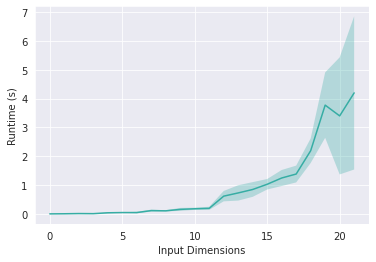

In [29]:
clrs = sns.color_palette("husl", 2)
x_ = range(means.shape[0])
with sns.axes_style("darkgrid"):
    plt.plot(means, c=clrs[1])
    plt.xticks([0, 5, 10, 15, 20])
    plt.ylabel("Runtime (s)")
    plt.xlabel("Input Dimensions")
    plt.fill_between(x_, means - std, means + std, alpha=0.3, facecolor=clrs[1])
plt.savefig('dims.pdf', dpi=300)

In [50]:
radii = np.linspace(0.01, 10, 20)
dims = 5
num_samples = 100
res_dims = []
for dims in range(4, 7):
    res = []
    for radius in radii:
        arch = [dims] * 3
        times = []
        for _ in range(num_samples):
            center = torch.rand(dims)
            net = ReLUNet(arch)
            simple_domain = Hyperbox.build_linf_ball(center, radius)
            cross_problem = LipMIP(net, simple_domain, 'l1Ball1', num_threads=8, verbose=True)
            start_time = time.time()
            cross_problem.compute_max_lipschitz()
            end_time = time.time()
            times.append(end_time - start_time)
        res.append(np.array(times))
        print(np.array(times).mean())
    res_dims.append(res)

0.006825895309448242
0.02240701675415039
0.0351175856590271
0.039764270782470704
0.040327980518341064
0.040741381645202634
0.04091776609420776
0.04142865896224976
0.04101475715637207
0.03963033676147461
0.041194100379943845
0.04230293989181519
0.040168640613555906
0.0404624080657959
0.04130388021469116
0.0408461594581604
0.04168512344360351
0.04074435472488403
0.041204090118408206
0.041462559700012204
0.00935112476348877
0.050530409812927245
0.06773635625839233
0.07032671928405762
0.0689160943031311
0.06950725078582763
0.07250585794448852
0.06965887069702148
0.07171847343444825
0.0695603370666504
0.07084428310394288
0.07185499668121338
0.07148654937744141
0.07146648406982421
0.06975990056991577
0.06947591543197632
0.07187170267105103
0.07091974020004273
0.07191925764083862
0.071645348072052
0.014420685768127441
0.08033989906311036
0.09645007371902466
0.10163394451141357
0.10651392221450806
0.10249112367630005
0.10068644523620605
0.10461873531341553
0.10758190631866454
0.099349565505981

In [51]:
final_res = []
for r in res_dims:
    res_means_ = np.array([item.mean() for item in r])
    res_std_ = np.array([item.std() for item in r])
    final_res.append((res_means_, res_std_))

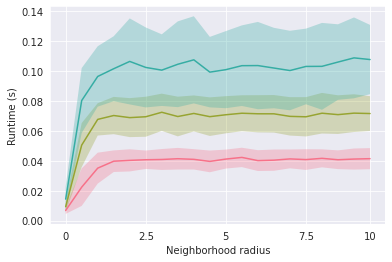

In [59]:
clrs = sns.color_palette("husl", 4)
resx_ = range(final_res[0][0].shape[0])
with sns.axes_style("darkgrid"):
    plt.xticks([0, 5, 10, 15, 19], ['0', '2.5', '5', '7.5', '10'])
    plt.ylabel("Runtime (s)")
    plt.xlabel("Neighborhood radius")
    for i, result in enumerate(final_res):
        res_means_ = result[0]
        res_std_ = result[1]
        plt.plot(res_means_, c=clrs[i])
        plt.fill_between(resx_, res_means_ - res_std_, res_means_ + res_std_, alpha=0.3, facecolor=clrs[i])
plt.savefig('radius.pdf', dpi=300)

In [73]:
radii = [0.1, 0.2, 0.3, 0.5]
num_samples = 50
res_radii = []
for radius in radii:
    res_layer = []
    for l in range(3, 10):
        arch = [5] * l
        times = []
        print(arch)
        for _ in range(num_samples):
            center = torch.rand(5)
            net = ReLUNet(arch)
            simple_domain = Hyperbox.build_linf_ball(center, radius)
            cross_problem = LipMIP(net, simple_domain, 'l1Ball1', num_threads=8, verbose=True)
            start_time = time.time()
            try:
                cross_problem.compute_max_lipschitz()
            except:
                continue
            end_time = time.time()
            times.append(end_time - start_time)
        res_layer.append(np.array(times))
        print(np.array(times).mean())
    res_radii.append(res_layer)

[5, 5, 5]
0.015384693145751954
[5, 5, 5, 5]
0.021846051216125487
[5, 5, 5, 5, 5]
0.02119138717651367
[5, 5, 5, 5, 5, 5]
0.026150074005126953
[5, 5, 5, 5, 5, 5, 5]
0.027078933715820312
[5, 5, 5, 5, 5, 5, 5, 5]
0.027993092536926268
[5, 5, 5, 5, 5, 5, 5, 5, 5]
INFEASIBLE
0.028469299783512036
[5, 5, 5]
0.023023028373718262
[5, 5, 5, 5]
0.03413193702697754
[5, 5, 5, 5, 5]
0.03725023746490479
[5, 5, 5, 5, 5, 5]
0.042161235809326174
[5, 5, 5, 5, 5, 5, 5]
0.04439517021179199
[5, 5, 5, 5, 5, 5, 5, 5]
0.04892660617828369
[5, 5, 5, 5, 5, 5, 5, 5, 5]
0.053688759803771975
[5, 5, 5]
0.0334016752243042
[5, 5, 5, 5]
0.05166579246520996
[5, 5, 5, 5, 5]
0.06986787319183349
[5, 5, 5, 5, 5, 5]
0.06479093551635742
[5, 5, 5, 5, 5, 5, 5]
0.06865350246429443
[5, 5, 5, 5, 5, 5, 5, 5]
0.05699504852294922
[5, 5, 5, 5, 5, 5, 5, 5, 5]
0.06244211196899414
[5, 5, 5]
0.05009165763854981
[5, 5, 5, 5]
0.07171617031097412
[5, 5, 5, 5, 5]
0.10257880687713623
[5, 5, 5, 5, 5, 5]
0.1258182954788208
[5, 5, 5, 5, 5, 5, 5]
0.1

In [76]:
final_res_radii = []
for r in res_radii:
    res_means_ = np.array([item.mean() for item in r])
    res_std_ = np.array([item.std() for item in r])
    final_res_radii.append((res_means_, res_std_))

ValueError: operands could not be broadcast together with shapes (20,) (7,) 

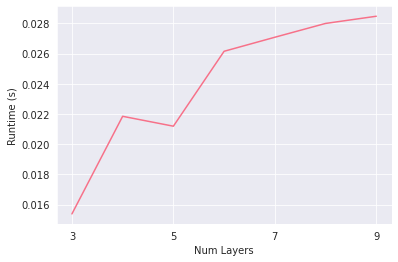

In [77]:
clrs = sns.color_palette("husl", 4)
resx_ = range(final_res[0][0].shape[0])
with sns.axes_style("darkgrid"):
    plt.xticks([0, 2, 4, 6, 8], ['3', '5', '7', '9', '11'])
    plt.ylabel("Runtime (s)")
    plt.xlabel("Num Layers")
    for i, result in enumerate(final_res_radii):
        res_means_ = result[0]
        res_std_ = result[1]
        plt.plot(res_means_, c=clrs[i], label=str(radii[i]))
        plt.fill_between(resx_, res_means_ - res_std_, res_means_ + res_std_, alpha=0.3, facecolor=clrs[i])
    plt.legend()
plt.savefig('layers.pdf', dpi=300)

In [146]:
epsilon = 5
delta = 0.1

center = z#torch.rand(10)
radius = 1.0
simple_domain = Hyperbox.build_linf_ball(center, radius)

# For now we are using center of 0 and l_inf norm of size 1 around the center to define the output space
output_domain = 'l1Ball1'

# TODO: Replace it with a trained NN
#network_simple = ReLUNet([8, 7, 5, 5])


In [147]:

cross_problem.compute_max_lipschitz()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1600 and 8x10)

In [145]:
cross_problem.result.value

0.4097048069197993